#### Import data

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = dataset.copy()

#### Data analysis

In [121]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [122]:
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [123]:
print(data.dtypes.value_counts())
print(data.info())

object     18
int64       2
float64     1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          704

In [124]:
# Let's see the data types if there are any issues
print(data.select_dtypes(include=["int"]).columns)
print(data.select_dtypes(include=["float"]).columns)
print(data.select_dtypes(include=["object"]).columns)

Index(['SeniorCitizen', 'tenure'], dtype='object')
Index(['MonthlyCharges'], dtype='object')
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [125]:
data = data.drop("customerID", axis=1)

In [126]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [127]:
# Looks like "TotalCharges" should be numerical value, not categorical. Needs to be fixed.
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

#check isnull for the TotalCharges column
print(data.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [128]:
# Replace null with 0 for TotalCharges, assuming that the customer has never been charged before
# Looks like the tenure is 0 for the customers with null TotalCharges, meaning that uncharged customers are new customers that have not been charged yet.
print(data[data["tenure"].isin([0])].index)
print(data[data["TotalCharges"].isna()].index)

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [129]:
# Therefore, we can replace the null values in TotalCharges with 0
data.loc[:,"TotalCharges"] = data.loc[:,"TotalCharges"].replace(np.nan,0)
data["TotalCharges"].isnull().sum()

0

In [56]:
# Also senioCitizen seems to be int in the data but it should be an object, so needs replacing
print(data["SeniorCitizen"].value_counts())

# Replace 1 with Yes and 0 with No
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [130]:
# final check for dtypes
print(data.select_dtypes(include=["int"]).columns)
print(data.select_dtypes(include=["float"]).columns)
print(data.select_dtypes(include=["object"]).columns)

Index(['SeniorCitizen', 'tenure'], dtype='object')
Index(['MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


#### Data preprocessing

In [131]:
# Let's encode the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# get all columns with object data type
text_data_features = [i for i in list(data.columns) if data[i].dtype == "object"]
print(text_data_features)

# transform the data
for i in text_data_features:
    data[i] = le.fit_transform(data[i])

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [132]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

data["tenure"] = mms.fit_transform(data[["tenure"]])
data["MonthlyCharges"] = mms.fit_transform(data[["MonthlyCharges"]])
data["TotalCharges"] = mms.fit_transform(data[["TotalCharges"]])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,1


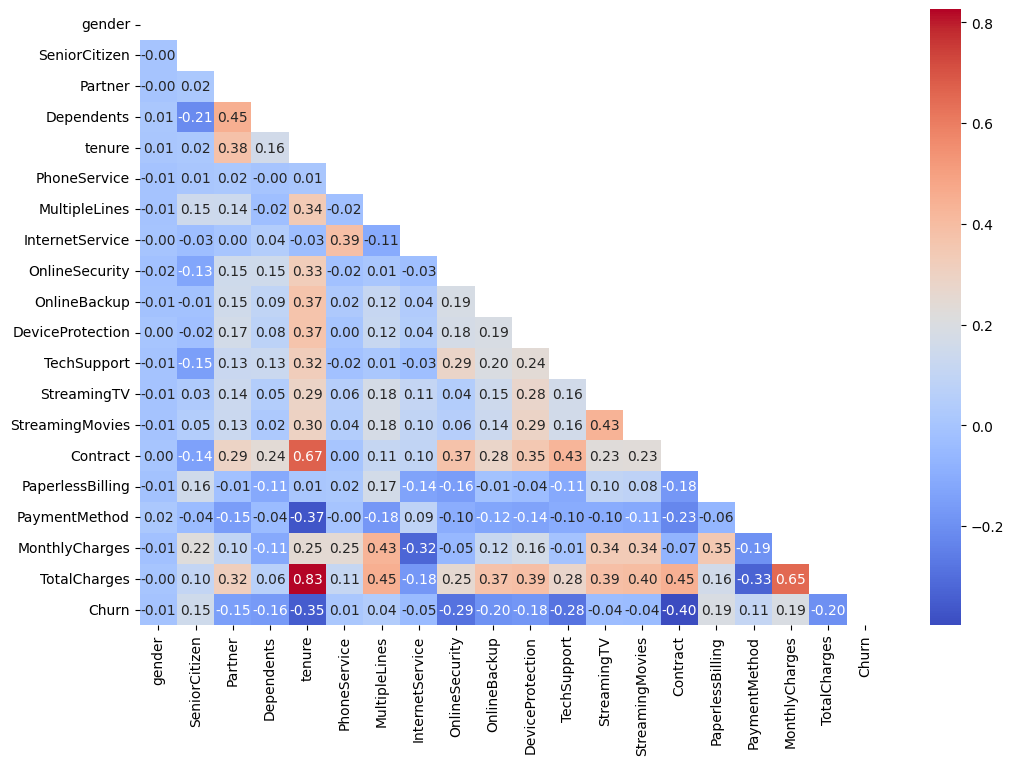

In [133]:
# correlation matrix
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

Feature Selection for Categorical Features

Text(0.5, 1.0, 'Correlation')

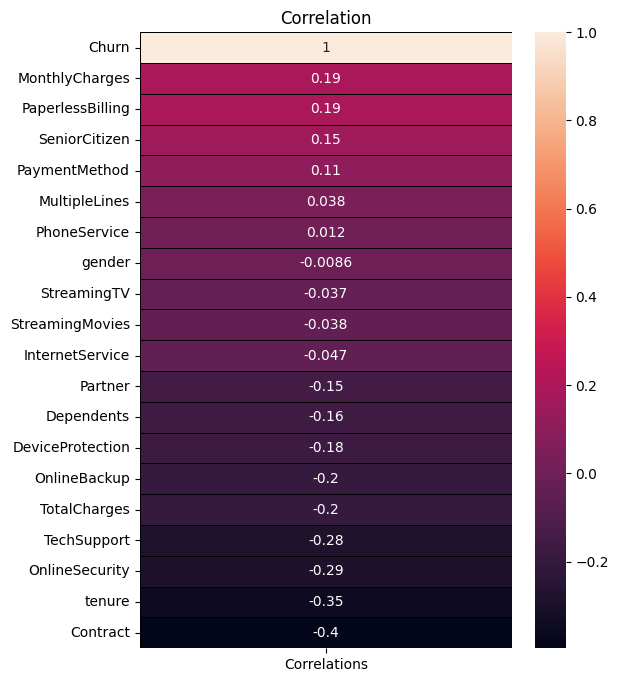

In [134]:
corr = data.corrwith(data["Churn"]).sort_values(ascending = False).to_frame()
corr.columns = ["Correlations"]
plt.subplots(figsize = (6,8))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = "black")
plt.title("Correlation")

Text(0.5, 1.0, 'Selection of Categorical Features')

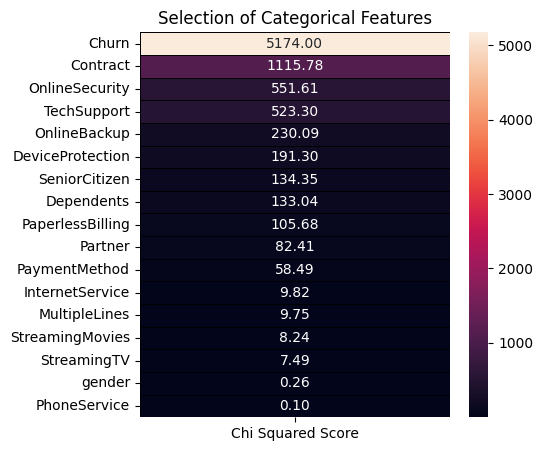

In [135]:
# Chi-Squared Test for cateogrical values
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

features = data.loc[:,categorical_features]
target = data.loc[:,"Churn"]

best_features = SelectKBest(score_func = chi2,k = "all")
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ["Chi Squared Score"]) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = "Chi Squared Score"),annot = True, linewidths = 0.4,linecolor = "black",fmt = ".2f")
plt.title("Selection of Categorical Features")

Feature Selection for Numerical Features

Text(0.5, 1.0, 'Selection of Numerical Features')

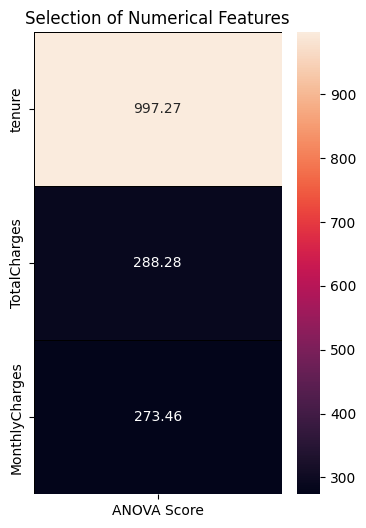

In [136]:
from sklearn.feature_selection import f_classif
# anova test
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
features = data.loc[:,numerical_features]
target = data.loc[:,"Churn"]

best_features = SelectKBest(score_func = f_classif,k = "all")
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ["ANOVA Score"]) 

plt.subplots(figsize = (4,6))
sns.heatmap(featureScores.sort_values(ascending = False,by = "ANOVA Score"),annot = True,linewidths = 0.4,linecolor = "black",fmt = ".2f")
plt.title("Selection of Numerical Features")

In [137]:
# based on feature selection, we can drop the following columns as they seem to have low correlation with the target variable
data.drop(columns = ["PhoneService", "gender","StreamingTV","StreamingMovies","MultipleLines","InternetService"],inplace = True)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.013889,0,2,0,0,0,1,2,0.115423,0.003437,0
1,0,0,0,0.472222,2,0,2,0,1,0,3,0.385075,0.217564,0
2,0,0,0,0.027778,2,2,0,0,0,1,3,0.354229,0.012453,1
3,0,0,0,0.625000,2,0,2,2,1,0,0,0.239303,0.211951,0
4,0,0,0,0.027778,0,0,0,0,0,1,2,0.521891,0.017462,1


In [138]:
# SMOTE - Synthetic Minority Over-sampling Technique
# SMOTE will be used to balance the data as the target variable is imbalanced using over-sampling
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 1)

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X, y = over.fit_resample(X, y)
Counter(y)

Counter({0: 5174, 1: 5174})

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

#### Build the models

In [142]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# model abstraction
def ml_model(classifier,X_train,y_train,X_test,y_test):    
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    return prediction

Logistic regression

In [143]:
from sklearn.linear_model import LogisticRegression
log_regr_model = LogisticRegression()
y_pred_log_reg = ml_model(log_regr_model,X_train,y_train,X_test,y_test)

accuracy_logistic_reggresion = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Model:")
print(f"Accuracy: {round(accuracy_logistic_reggresion*100,1)}%")
print("Confussion Matrix:")
print(confusion_matrix(y_test,log_regr_model.predict(X_test)))

print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Model:
Accuracy: 77.0%
Confussion Matrix:
[[754 312]
 [165 839]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1066
           1       0.73      0.84      0.78      1004

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070



K-Nearest Neighbors

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =KNeighborsClassifier(n_neighbors=5)
y_pred_knn = ml_model(knn_model,X_train,y_train,X_test,y_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Model:")
print(f"Accuracy: {round(accuracy_knn*100,1)}%")
print("Confussion Matrix:")
print(confusion_matrix(y_test,knn_model.predict(X_test)))

print(classification_report(y_test, y_pred_knn))

KNN Model:
Accuracy: 78.9%
Confussion Matrix:
[[747 319]
 [117 887]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1066
           1       0.74      0.88      0.80      1004

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



XGBoost

In [145]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
y_pred_xgboost = ml_model(xgboost_model,X_train,y_train,X_test,y_test)

accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print("XGBoost Model:")
print(f"XGBoost Model: {round(accuracy_xgboost*100,1)}%")
print("Confussion Matrix:")
print(confusion_matrix(y_test,xgboost_model.predict(X_test)))

print(classification_report(y_test, y_pred_xgboost))

XGBoost Model:
XGBoost Model: 82.4%
Confussion Matrix:
[[849 217]
 [148 856]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1066
           1       0.80      0.85      0.82      1004

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070



CatBoost

In [150]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
y_pred_catboost = ml_model(catboost_model,X_train,y_train,X_test,y_test)

accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print("CatBoost Model:")
print(f"CatBoost Model: {round(accuracy_catboost*100,1)}%")
print("Confussion Matrix:")
print(confusion_matrix(y_test,catboost_model.predict(X_test)))

print(classification_report(y_test, y_pred_catboost))

Learning rate set to 0.025403
0:	learn: 0.6799114	total: 6.08ms	remaining: 6.07s
1:	learn: 0.6686164	total: 11.9ms	remaining: 5.94s
2:	learn: 0.6575579	total: 18.1ms	remaining: 6s
3:	learn: 0.6469546	total: 23.8ms	remaining: 5.92s
4:	learn: 0.6373443	total: 29.7ms	remaining: 5.92s
5:	learn: 0.6279655	total: 36.4ms	remaining: 6.03s
6:	learn: 0.6196208	total: 43.2ms	remaining: 6.13s
7:	learn: 0.6117631	total: 51.3ms	remaining: 6.37s
8:	learn: 0.6035486	total: 60.4ms	remaining: 6.65s
9:	learn: 0.5965213	total: 68.4ms	remaining: 6.77s
10:	learn: 0.5902978	total: 75.1ms	remaining: 6.75s
11:	learn: 0.5837741	total: 82ms	remaining: 6.75s
12:	learn: 0.5777165	total: 89.6ms	remaining: 6.81s
13:	learn: 0.5716048	total: 97.1ms	remaining: 6.84s
14:	learn: 0.5659966	total: 105ms	remaining: 6.89s
15:	learn: 0.5610895	total: 113ms	remaining: 6.94s
16:	learn: 0.5559416	total: 120ms	remaining: 6.92s
17:	learn: 0.5513008	total: 127ms	remaining: 6.93s
18:	learn: 0.5461601	total: 133ms	remaining: 6.89s
19

LightGBM

In [152]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()
y_pred_lightgbm = ml_model(lgbm_model,X_train,y_train,X_test,y_test)

accuracy_lightgbm = accuracy_score(y_test, y_pred_lightgbm)
print("LightGBM Model:")
print(f"LightGBM Model: {round(accuracy_lightgbm*100,1)}%")
print("Confussion Matrix:")
print(confusion_matrix(y_test,lgbm_model.predict(X_test)))

print(classification_report(y_test, y_pred_lightgbm))

[LightGBM] [Info] Number of positive: 4170, number of negative: 4108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1321
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503745 -> initscore=0.014980
[LightGBM] [Info] Start training from score 0.014980
LightGBM Model:
LightGBM Model: 84.6%
Confussion Matrix:
[[868 198]
 [121 883]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1066
           1       0.82      0.88      0.85      1004

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



AdaBoost

In [153]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier()
y_pred_adaboost = ml_model(adaboost_model,X_train,y_train,X_test,y_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Model:")
print(f"AdaBoost Model: {round(accuracy_adaboost*100,1)}%")
print("Confussion Matrix:")
print(confusion_matrix(y_test,adaboost_model.predict(X_test)))

print(classification_report(y_test, y_pred_adaboost))

c:\Users\justi\Desktop\projects\kaggle-projects\telco-churn-analysis\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model:
AdaBoost Model: 80.0%
Confussion Matrix:
[[784 282]
 [133 871]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1066
           1       0.76      0.87      0.81      1004

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



Gradient Boosting

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier()
y_pred_gradient_boosting = ml_model(gradient_boosting_model,X_train,y_train,X_test,y_test)

accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print("Gradient Boosting Model:")
print(f"Gradient Boosting Model: {round(accuracy_gradient_boosting*100,1)}%")
print("Confussion Matrix:")
print(confusion_matrix(y_test,gradient_boosting_model.predict(X_test)))

print(classification_report(y_test, y_pred_gradient_boosting))

Gradient Boosting Model:
Gradient Boosting Model: 81.7%
Confussion Matrix:
[[812 254]
 [125 879]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1066
           1       0.78      0.88      0.82      1004

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [156]:
#Let's test Artificial Neural Networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_ann = Sequential()
model_ann.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model_ann.add(Dense(32, activation="relu"))
model_ann.add(Dense(1, activation="sigmoid"))

model_ann.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_ann.fit(X_train, y_train, epochs=20, batch_size=10)

_, accuracy_ANN = model_ann.evaluate(X_test, y_test)

print("Neural Network Model:")
print(f"Neural Network Model: {round(accuracy_ANN*100,1)}%")
print("Confussion Matrix:")
print(confusion_matrix(y_test,model_ann.predict(X_test).round()))
y_pred_ANN = model_ann.predict(X_test).round()
print(classification_report(y_test, y_pred_ANN))

Epoch 1/20
828/828 [==============================] - 2s 1ms/step - loss: 0.5056 - accuracy: 0.7574
Epoch 2/20
828/828 [==============================] - 1s 1ms/step - loss: 0.4791 - accuracy: 0.7743
Epoch 3/20
828/828 [==============================] - 1s 1ms/step - loss: 0.4727 - accuracy: 0.7772
Epoch 4/20
828/828 [==============================] - 1s 1ms/step - loss: 0.4674 - accuracy: 0.7784
Epoch 5/20
828/828 [==============================] - 1s 1ms/step - loss: 0.4635 - accuracy: 0.7849
Epoch 6/20
828/828 [==============================] - 1s 1ms/step - loss: 0.4614 - accuracy: 0.7847
Epoch 7/20
828/828 [==============================] - 1s 1ms/step - loss: 0.4560 - accuracy: 0.7906
Epoch 8/20
828/828 [==============================] - 1s 1ms/step - loss: 0.4535 - accuracy: 0.7862
Epoch 9/20
828/828 [==============================] - 1s 1ms/step - loss: 0.4496 - accuracy: 0.7934
Epoch 10/20
828/828 [==============================] - 1s 1ms/step - loss: 0.4465 - accuracy: 0.7955

#### Modelling results

| Model                | Accuracy |
|----------------------|----------|
| LightGBM             | 84.6%    |
| CatBoost             | 84.4%    |
| XGBoost              | 82.4%    |
| Gradient Boosting    | 81.7%    |
| AdaBoost             | 80.0%    |
| K-Nearest Neighbors  | 78.9%    |
| Neural Network       | 78.4%    |
| Logistic Regression | 77.0%    |